In [1]:
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt

In [2]:
# set other file name to get data with other days
data = pd.read_csv("data/nyt1.csv")

In [3]:
def drop_0(data):
    data = data.fillna(0)
    data = data.drop(data.query("Age == 0").index, axis='rows')
    return data
data = drop_0(data)

In [4]:
def age_group(data):
    data = data.reset_index()
    for item in range(len(data)):
        if data.loc[item, "Age"] < 18:
            data.loc[item, "Age_group"] = 0
            data.loc[item, "Age_group_legend"] = '<18'
        elif 18 < data.loc[item, "Age"] < 24:
            data.loc[item, "Age_group"] = 1
            data.loc[item, "Age_group_legend"] = '18-24'
        elif 24 < data.loc[item, "Age"] < 34:
            data.loc[item, "Age_group"] = 2
            data.loc[item, "Age_group_legend"] = '24-34'
        elif 34 < data.loc[item, "Age"] < 44:
            data.loc[item, "Age_group"] = 3
            data.loc[item, "Age_group_legend"] = '34-44'
        elif 44 < data.loc[item, "Age"] < 54:
            data.loc[item, "Age_group"] = 4
            data.loc[item, "Age_group_legend"] = '44-54'
        elif 54 < data.loc[item, "Age"] < 65:
            data.loc[item, "Age_group"] = 5
            data.loc[item, "Age_group_legend"] = '54-65'
        elif 65 < data.loc[item, "Age"]:
            data.loc[item, "Age_group"] = 5
            data.loc[item, "Age_group_legend"] = '65+'
    return data
data = age_group(data)

In [5]:
def add_ctr(data):
    data = data.assign(ctr=data.Clicks / data.Impressions)
    return data
data = add_ctr(data)

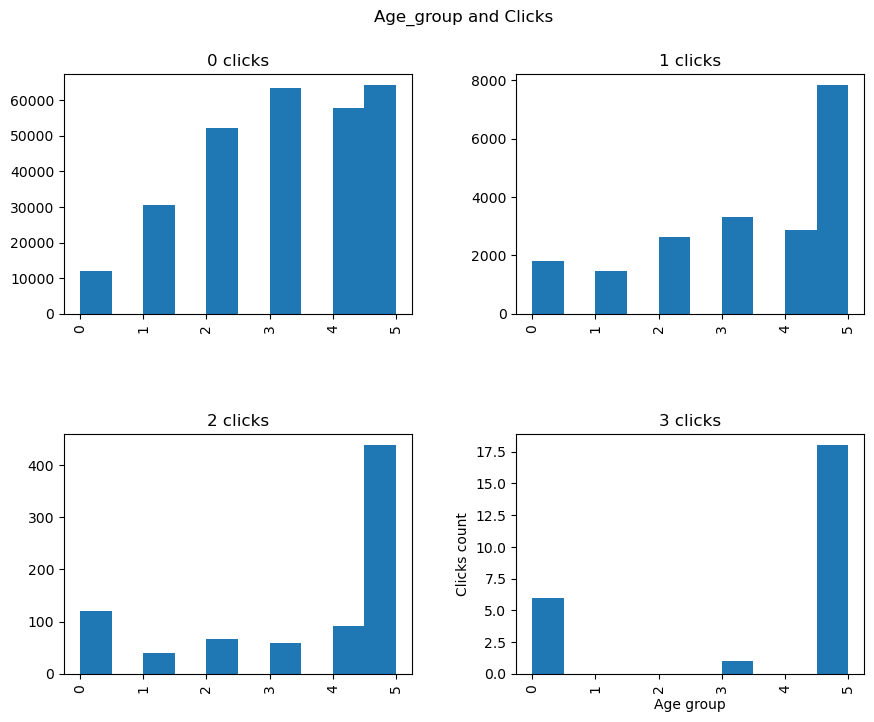

In [6]:
def first_plot(data):
    axes = data.hist(column="Age_group", by="Clicks", figsize=(10, 8))
    for i in range(len(axes)):
        for j in range(len(axes[i])):
            if i == 0:
                if j == 0:
                    axes[i][j].set_title('0 clicks')
                else:
                    axes[i][j].set_title('1 clicks')
            else:
                if j == 0:
                    axes[i][j].set_title('2 clicks')
                else:
                    axes[i][j].set_title('3 clicks')

    plt.xlabel('Age group')
    plt.ylabel("Clicks count")
    pl.suptitle('Age_group and Clicks')
    plt.show()
first_plot(data)


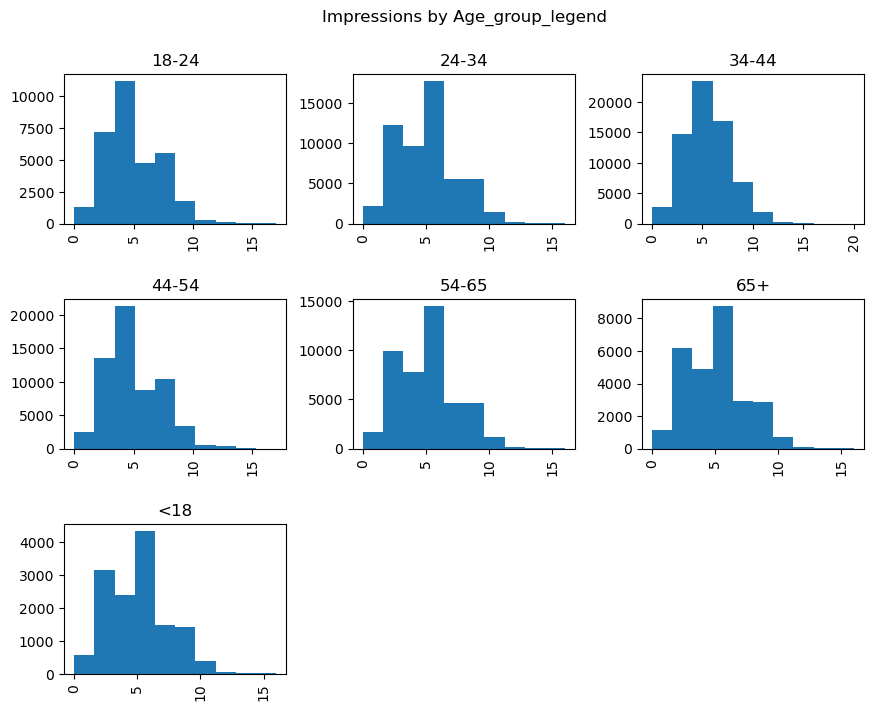

In [7]:
def second_plot(data):
    data.hist(column=["Impressions"], by="Age_group_legend", figsize=(10, 8))
    plt.xlabel('Impressions')
    plt.ylabel("Impressions count")
    pl.suptitle('Impressions by Age_group_legend')
    plt.show()
second_plot(data)


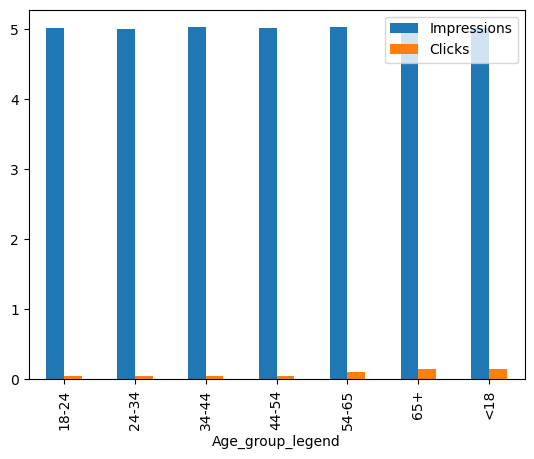

In [8]:
def set_mean(data):
    data = data[['Impressions', 'Clicks', 'Age_group_legend']].groupby(['Age_group_legend']).mean()
    data.plot.bar()
    plt.show()
set_mean(data)


In [9]:
def print_general_disp(data):
    print(data.var())
print_general_disp(data)


index          1.748351e+10
Age            2.659547e+02
Gender         2.494418e-01
Impressions    5.012152e+00
Clicks         7.217779e-02
Signed_In      0.000000e+00
Age_group      2.165405e+00
ctr            3.633640e-03
dtype: float64


C:\Users\podol\AppData\Local\Temp\ipykernel_136328\3211975835.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.var())


In [10]:
def set_min_value(data):
    for columns in data.columns:
        if columns != 'Age_group' and columns != 'Age_group_legend' and columns != 'Gender' and columns != 'index':
            print(f'{columns}: {data[columns].min()}')
set_min_value(data)


Age: 7
Impressions: 0
Clicks: 0
Signed_In: 1
ctr: 0.0


In [11]:
def create_table(data):
    data = data.groupby(['Age_group_legend', 'Gender']).mean()
    print(data[['Age', 'Impressions', 'Clicks', 'Signed_In']].quantile([.1, .25, .5, .75], axis=0))
    print(data)
create_table(data)


            Age  Impressions    Clicks  Signed_In
0.10  16.988007     4.994020  0.049258        1.0
0.25  23.059940     5.004745  0.050545        1.0
0.50  39.225213     5.011607  0.051715        1.0
0.75  56.915182     5.020919  0.134995        1.0
                                 index        Age  Impressions    Clicks  \
Age_group_legend Gender                                                    
18-24            0       228133.116740  21.003404     5.019023  0.048992   
                 1       227105.922767  20.997898     5.006538  0.048395   
24-34            0       228598.147281  29.229550     5.005570  0.050483   
                 1       229926.199541  29.237539     4.982850  0.050733   
34-44            0       229013.071935  39.233142     5.014655  0.050766   
                 1       229099.676000  39.217285     5.028705  0.052232   
44-54            0       230150.238109  49.235140     5.004470  0.051198   
                 1       230183.020567  49.228974     5.013815  0.